Assignment 3 Data Visualization, EDA and Statistics

Exploratory data analysis on COVID-19 across the globe.
Problem is divided into 3 sections.

Data Understaing,
EDA and Visualization
Statistics.

Please pledge for honour code.

I,Dubbaka Srikanth, promise that during the course of this assignment
I shall not use unethical and nefarious means in an attempt to defraud the sanctity of the assignment 
and gain an unfair advantage. I will adhere to the virtues of truth and honesty. 
I will honour the SURE Trust honour code.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
data = pd.read_csv(r'F:\covid_19.csv')

Data Understanding

In [4]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
#1 properties of data. shape, columns
data.shape

(49068, 10)

In [6]:
#1 properties of data. shape, columns
data.columns.tolist()

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'Date',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'WHO Region']

In [7]:
#2 data glipse with info and describe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
#2 data glipse with info and describe
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [9]:
#(Optional step) Data cleaning if required.
pd.set_option('display.max_rows', 180)
(data.filter(['Country/Region' ,'Date' ,'Confirmed', 'Deaths','Recovered', 'Active', 'WHO Region' ]).drop_duplicates())

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,2020-07-27,865,14,734,117,Africa
49064,Yemen,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,2020-07-27,7235,60,6028,1147,Europe


In [10]:
(data
 .isnull()
 .sum()
)

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [11]:
#3 which country had highest covid DEATHS in january 2020.
df=data[(data.Date>='2020-01-01') & (data.Date<='2020-01-31')]
df[df.Deaths==df.Deaths.max()][['Country/Region']]

,Country/Region
2410,China


In [12]:
#4 which WHO region had highest ACTIVE covid cases in March 2020.
dx=data[(data.Date>='2020-03-01') & (data.Date<='2020-03-31')]
dx[dx.Active==dx.Active.max()][['WHO Region']]

,WHO Region
18232,Americas


In [13]:
#5 print top 5 countries with highest CONFIRMED covid cases. Print month wise.
"""dp=data.loc[data["Date"]=="2020-03-22"].sort_values(by='Confirmed',ascending=False)
dp.head(10)"""
for i in range(1,6):
    i=str(i)
    m=data[(data.Date>='2020-0'+i+'-01') & (data.Date<='2020-0'+i+'-31')]
    m.sort_values('Confirmed')
    print(m[-5:][['Country/Region']])

             Country/Region
2605  Sao Tome and Principe
2606                  Yemen
2607                Comoros
2608             Tajikistan
2609                Lesotho
              Country/Region
10174  Sao Tome and Principe
10175                  Yemen
10176                Comoros
10177             Tajikistan
10178                Lesotho
              Country/Region
18265  Sao Tome and Principe
18266                  Yemen
18267                Comoros
18268             Tajikistan
18269                Lesotho
              Country/Region
26095  Sao Tome and Principe
26096                  Yemen
26097                Comoros
26098             Tajikistan
26099                Lesotho
              Country/Region
34186  Sao Tome and Principe
34187                  Yemen
34188                Comoros
34189             Tajikistan
34190                Lesotho


In [14]:
#6 top 3 countries with highest DEATH covid cases print month wise.
"""dp=data.loc[data["Date"]=="2020-02-22"].sort_values(by='Deaths',ascending=False)
dp.head(3)"""
for i in range(1,12):
    i=str(i)
    o=data[(data.Date>='2020-0'+i+'-01') & (data.Date<='2020-0'+i+'-31')]
    o.sort_values('Deaths')
    print(o[-3:][["Country/Region"]])

     Country/Region
2607        Comoros
2608     Tajikistan
2609        Lesotho
      Country/Region
10176        Comoros
10177     Tajikistan
10178        Lesotho
      Country/Region
18267        Comoros
18268     Tajikistan
18269        Lesotho
      Country/Region
26097        Comoros
26098     Tajikistan
26099        Lesotho
      Country/Region
34188        Comoros
34189     Tajikistan
34190        Lesotho
      Country/Region
42018        Comoros
42019     Tajikistan
42020        Lesotho
      Country/Region
49065        Comoros
49066     Tajikistan
49067        Lesotho
Empty DataFrame
Columns: [Country/Region]
Index: []
Empty DataFrame
Columns: [Country/Region]
Index: []
Empty DataFrame
Columns: [Country/Region]
Index: []
Empty DataFrame
Columns: [Country/Region]
Index: []


In [15]:
#7 print countries which are amongst top 10 with highest CONFIRMED cases 
# for 3 months consecutively. 
"""p=[]
for i in range(1,8):
    i=str(i)
    q=data[(data.Date>='2022-0'+i+'-01')&(data.Date>='2022-0'+i+'-31')]
    q.sort_values('Confirmed')
    p.append(q[-10:][['Country/Region']].values)
for i in range(5):
    print(p[i][np.in1d(p[i],p[i+1],p[i+2])])"""
p=[]
for i in range(1,8):
 i=str(i)
 q=data[(data.Date>='2020-0'+i+'-01') & (data.Date<='2020-0'+i+'-31')]
 q.sort_values('Confirmed')
 p.append(q[-10:][['Country/Region']].values)
for i in range(5):
 print( p[i][np.in1d(p[i],p[i+1],p[i+2])] )

[['Malawi']
 ['United Kingdom']
 ['France']
 ['South Sudan']
 ['Western Sahara']
 ['Sao Tome and Principe']
 ['Yemen']
 ['Comoros']
 ['Tajikistan']
 ['Lesotho']]
[['Malawi']
 ['United Kingdom']
 ['France']
 ['South Sudan']
 ['Western Sahara']
 ['Sao Tome and Principe']
 ['Yemen']
 ['Comoros']
 ['Tajikistan']
 ['Lesotho']]
[['Malawi']
 ['United Kingdom']
 ['France']
 ['South Sudan']
 ['Western Sahara']
 ['Sao Tome and Principe']
 ['Yemen']
 ['Comoros']
 ['Tajikistan']
 ['Lesotho']]
[['Malawi']
 ['United Kingdom']
 ['France']
 ['South Sudan']
 ['Western Sahara']
 ['Sao Tome and Principe']
 ['Yemen']
 ['Comoros']
 ['Tajikistan']
 ['Lesotho']]
[['Malawi']
 ['United Kingdom']
 ['France']
 ['South Sudan']
 ['Western Sahara']
 ['Sao Tome and Principe']
 ['Yemen']
 ['Comoros']
 ['Tajikistan']
 ['Lesotho']]


In [16]:
#8 how many total CONFIRMED cases in Asia as per dataset
a=data[data['WHO Region']=='South-East Asia'].Confirmed.sum()
a

55118365

In [17]:
#9 Which WHO region have highest DEATHS?
p=data.sort_values(by='Deaths',ascending=False)
p.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,NaN,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444,Americas


In [18]:
#10 print top 10 contries with LOWEST CONFIRMED:DEATH ratio print month wise.
p=data.sort_values(by='Deaths',ascending=True)
p.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
14989,St Martin,France,18.070800,-63.050100,2020-03-19,4,0,0,4,Europe
14988,Saint Barthelemy,France,17.900000,-62.833300,2020-03-19,3,0,0,3,Europe
14987,Reunion,France,-21.115100,55.536400,2020-03-19,14,0,0,14,Europe
14986,New Caledonia,France,-20.904305,165.618042,2020-03-19,2,0,0,2,Europe
14985,Mayotte,France,-12.827500,45.166244,2020-03-19,3,0,0,3,Europe
14984,Guadeloupe,France,16.265000,-61.551000,2020-03-19,33,0,0,33,Europe
14983,French Polynesia,France,-17.679700,149.406800,2020-03-19,6,0,0,6,Europe
14992,NaN,Gabon,-0.803700,11.609400,2020-03-19,1,0,0,1,Africa
14982,French Guiana,France,3.933900,-53.125800,2020-03-19,11,0,0,11,Europe


In [19]:
#11 print India's CONFIRMED:RECOVERED cases ratio in the month of March
ab=data[(data.Date>='2020-03-01')& (data.Date>='2020-03-31')]
ab.Recovered.sum()/ab.Confirmed.sum()

0.4709724860053174

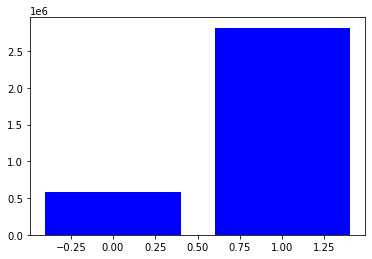

In [20]:
#12 which month have highest active cases in USA.
plt.bar(data['Country/Region']=='US', data['Active'], color='blue')
plt.show()

In [22]:
#12 which month have highest active cases in USA.
highest_active_cases=data.groupby(['Country/Region','Date']).sum("Active")
print(highest_active_cases.sort_values(by="Active",ascending=False).head(1))

                            Lat   Long  Confirmed  Deaths  Recovered   Active
Country/Region Date                                                          
US             2020-07-27  40.0 -100.0    4290259  148011    1325804  2816444


<function matplotlib.pyplot.show(close=None, block=None)>

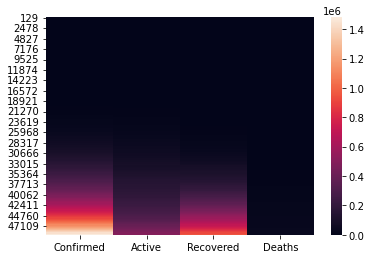

In [122]:
sns.heatmap(data[data['Country/Region']=='India'][['Confirmed','Active','Recovered','Deaths']])
plt.show

<BarContainer object of 187 artists>

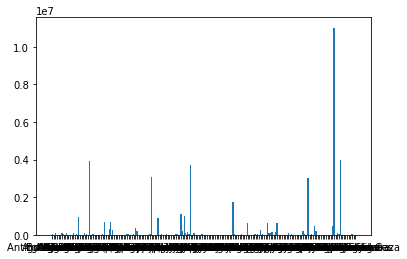

In [107]:
dx ={i:j.Deaths.sum() for i,j in data.groupby('Country/Region')}
plt.bar(dx.keys(),dx.values())

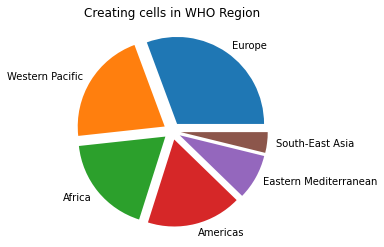

In [91]:
# create as many cells as required to do EDA and visulization. show your creativity.
c=data['WHO Region'].value_counts().to_dict()
#plt.title('WHO Region')
plt.title('Creating cells in WHO Region')
plt.pie(c.values(),labels=c.keys(),explode=[0.1]*6)
plt.show()

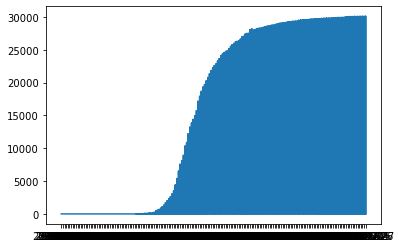

In [112]:
pt=data[data['Country/Region']=='France']
plt.plot(pt.Date, pt.Deaths)

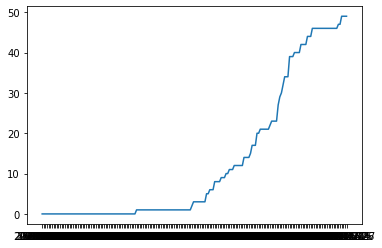

In [113]:
pt=data[data['Country/Region']=='Gabon']
plt.plot(pt.Date, pt.Deaths)

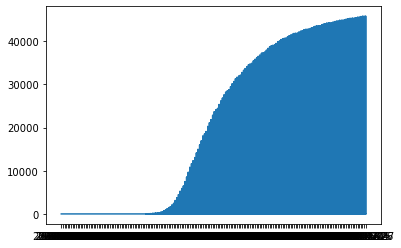

In [114]:
pt=data[data['Country/Region']=='United Kingdom']
plt.plot(pt.Date, pt.Deaths)

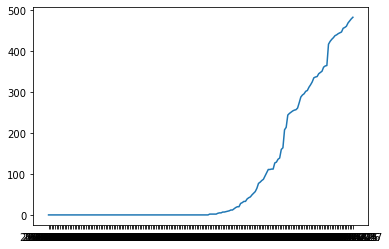

In [115]:
pt=data[data['Country/Region']=='Yemen']
plt.plot(pt.Date, pt.Deaths)

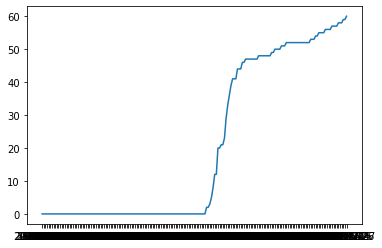

In [116]:
pt=data[data['Country/Region']=='Tajikistan']
plt.plot(pt.Date, pt.Deaths)

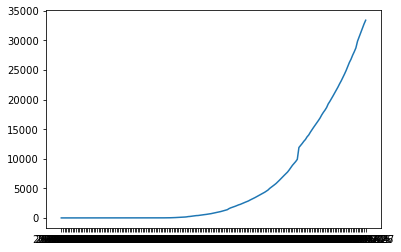

In [108]:
pt=data[data['Country/Region']=='India']
plt.plot(pt.Date, pt.Deaths)

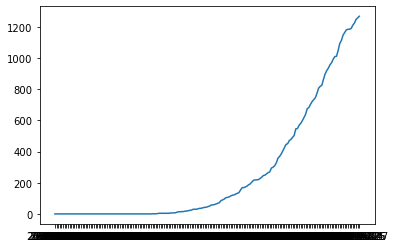

In [110]:
pt=data[data['Country/Region']=='Afghanistan']
plt.plot(pt.Date, pt.Deaths)

<function matplotlib.pyplot.show(close=None, block=None)>

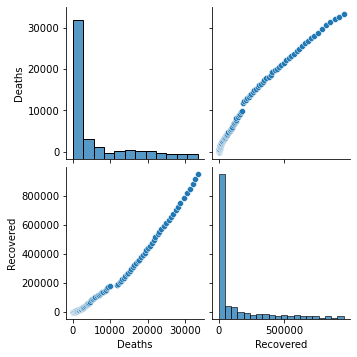

In [117]:
sns.pairplot(data[data['Country/Region']=='India'][['Deaths', 'Recovered']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

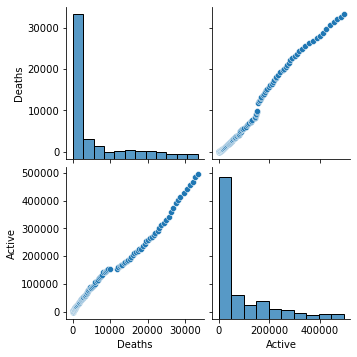

In [125]:
sns.pairplot(data[data['Country/Region']=='India'][['Deaths', 'Active']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

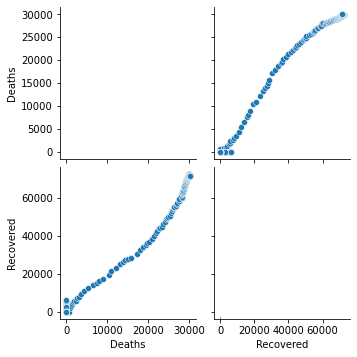

In [118]:
sns.pairplot(data[data['Country/Region']=='France'][['Deaths', 'Recovered']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

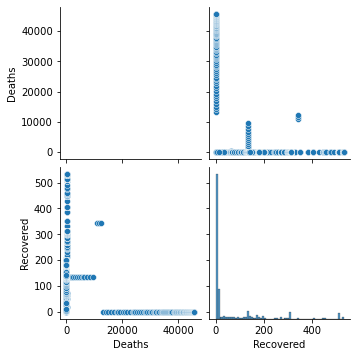

In [119]:
sns.pairplot(data[data['Country/Region']=='United Kingdom'][['Deaths', 'Recovered']])
plt.show

Statistics

In [99]:
#13 write a function to calculate standard deviation. (don't use builtin methods)
dx=data[data['Country/Region']=='India'].Deaths
np.sqrt(sum((dx-dx.mean())**2/len(dx)))

8976.169694119606

In [96]:
#14 write a function to calculate pearson's r for two numerical columns.
dm=pd.DataFrame({'A':range(4), 'B': [2*i for i in range(4)]})
dm['A'].corr(dm['B'])
dm.corr()

,A,B
A,1.0,1.0
B,1.0,1.0


In [101]:
#15 what is central limit theorem.
"""The mean of all the given samples of a population is the same as the 
mean of the population(approx) if the sample size is sufficiently large
enough with a finite variation."""

'The mean of all the given samples of a population is the same as the \nmean of the population(approx) if the sample size is sufficiently large\nenough with a finite variation.'

Hypothesis testing
Critical Value Method

Consider this problem — H₀: μ ≤ 350 and H₁: μ > 350

In case of a two-tailed test, you find the z-score of 0.975 in the z-table,
since 0.975 was cumulative probability of UCV in that case.
In this problem, what would be the cumulative probability of critical point
in this example for the same significance level of 5%? Type your answer below cell

In [102]:
#16 Type your answer here.
""" The cumulative probability of the critical point (the total area till that point) would be 0.950
&  significance level of 5% is 0.0475"""

' The cumulative probability of the critical point (the total area till that point) would be 0.950\n&  significance level of 5% is 0.0475'

Using Critical Value Method

Consider this problem, H₀: μ ≤ 350 and H₁: μ > 350

So, the Zc comes out to be 1.645. Now, find the critical value for the given Zc 
and make the decision to accept or reject the null hypothesis.

μ = 350 σ = 90 N (Sample size) = 36 ¯x= 370.16



In [105]:
#17 type your answer here.
"""The critical value for the given Zc is 374.67 and 
The decision to accept or reject the null hypothesis is Rejected"""

'The critical value for the given Zc is 374.67 and \nThe decision to accept or reject the null hypothesis is Rejected'

Let’s solve the following problem on how to make a decision about any hypothesis using the p-value method.

You are working as a data analyst at an auditing firm. A manufacturer claims that the average life of its product is 36 months. An auditor selects a sample of 49 units of the product, and calculates the average life to be 34.5 months. The population standard deviation is 4 months. Test the manufacturer’s claim at 3% significance level using the p-value method.

First, formulate the hypotheses for this two-tailed test, which would be:

                   H₀: μ = 36 months and H₁: μ ≠ 36 months
Now, you need to follow the three steps to find the p-value and make a decision.

STEP 1 - Calculate the value of z-score for the sample mean point on the distribution. Calculate z-score for sample mean (¯x) = 34.5 months.

STEP 2 - Calculate the p-value from the cumulative probability for the calculated z-score using the z-table.(Hint z-score of -2.62 )

Hint: The sample mean is on the left side of the distribution and it is a two-tailed test.

In [124]:
#18 type your answer
"""STEP 1 --> the value of z-score for the sample mean point on the distribution.
z-score for sample mean (¯x) = 34.5 months is (34.5 - 36)/(4/√49) = (-1.5) * 7/4 = -2.62.
STEP 2 --> The value in the z-table corresponding to -2.6 on the vertical
axis and 0.02 on the horizontal axis is 0.0044.
The p-value would be 2 * 0.0044 = 0.0088."""

'STEP 1 --> the value of z-score for the sample mean point on the distribution.\nz-score for sample mean (¯x) = 34.5 months is (34.5 - 36)/(4/√49) = (-1.5) * 7/4 = -2.62.\nSTEP 2 --> The value in the z-table corresponding to -2.6 on the vertical\naxis and 0.02 on the horizontal axis is 0.0044.\nThe p-value would be 2 * 0.0044 = 0.0088.'